# MA934 - Week 10 (assessed!) Problem Sheet

## Deadline: 17:00 (UK time) on Friday 15 December 

For this assignment, you must create a new Jupyter notebook called MA934_Week10_UniID.ipynb to contain the implementations that you write. This should also be exported as a .pdf file such that all execution output (from data to plots) is visible as produced on your own machine. You can separate out individual tasks if you prefer, but the full submission should be made as a single .zip via [our website](https://warwick.ac.uk/fac/sci/mathsys/courses/msc/ma934/resources/assessedwork/ma934declaration). The platform will not allow you to upload more than one file.

A few tips:
- please make sure to debug intermediate outputs as you code along. You are welcome to design smaller test cases and toy problems to verify your work (even if they are not part of the final submission).
- consider possible forms of input or arguments and make sure your solution can cope with *interesting* cases.
- do not forget to comment your code and use Markdown cells to explain what you are doing. A perfectly functional solution with no information about the thought process will not receive more than a subset of the points (~$70\%$ depending on the difficulty of the problem and how transparent the algorithm flow is). 
- generally getting used to writing tidy solutions is good practice. Feel free to use [online resources](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) for editing guidance.

The problems below provide opportunities to experiment with some of the concepts we covered theoretically in the lectures, focusing on linear programming and solving ODEs.

## Task 1 - Solving a simple linear programme [25 marks]

Consider the following linear programme

$$\min_{\substack{(x_1, x_2) \in \mathbb{R}^2} } -40\, x_1 - 60\, x_2$$

subject to the constraints

$$2\, x_1 + x_2 \leq 70 $$
$$x_1 + 3\, x_2 \leq 90 $$
$$ 3\, x_1 + x_2 \geq 46 $$
$$ x_1 + 4\, x_2 \geq 52 $$

with $x_1 \geq 0$ and $x_2 \geq 0$.

Sketch the feasible set for this problem.

Determine the coordinates of the vertices of the feasible set in $\mathbb{R}^2$ and thereby determine the solution of the problem.

# Task 1: Solution

Lets rewrite the problem in more convenient way:


$$\max_{\substack{(x_1, x_2) \in \mathbb{R}^2} } f(x_1,x_2)=40\, x_1 +60\, x_2$$

subject to the constraints

$$ x_2 \leq 70 -2\, x_1 $$
$$ x_2 \leq 30 - \frac{x_1}{3}$$
$$ x_2 \geq 46 -3\, x_1 $$
$$ x_2 \geq 13-\frac{x_1}{4} $$

with $x_1 \geq 0$ and $x_2 \geq 0$.

Now we can easily plot the complement to the feasible set, so feasible set will be white in the plot below. 

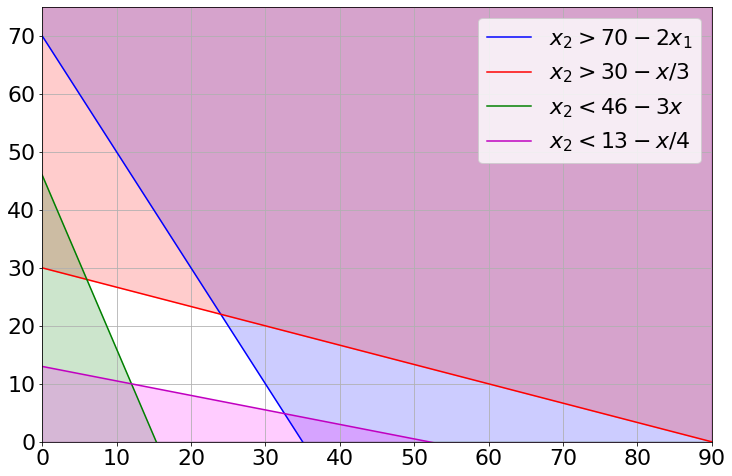

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 90.01, 0.1)

def f1(inputlist):
    return [70.0 - 2.0*i for i in inputlist]

def f2(inputlist):
    return [30.0 - i/3.0 for i in inputlist]

def f3(inputlist):
    return [46.0 - 3.0*i for i in inputlist]

def f4(inputlist):
    return [13.0 - i/4.0 for i in inputlist]

# Plot inequalities
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

plt.plot(x, f1(x), "b-", label = "$x_2 > 70-2 x_1$")
plt.fill_between(x, f1(x), 75.0, color='blue', alpha=.2)

plt.plot(x, f2(x), "r-", label = "$x_2 > 30-x/3$")
plt.fill_between(x, f2(x), 75.0, color='red', alpha=.2)

plt.plot(x, f3(x), "g-", label = "$x_2 < 46-3x$")
plt.fill_between(x, 0.0, f3(x), color='green', alpha=.2)

plt.plot(x, f4(x), "m-", label = "$x_2 < 13-x/4$")
plt.fill_between(x, 0.0, f4(x), color='magenta', alpha=.2)

plt.legend(loc="upper right")

plt.xlim([0.0, 90.0])
plt.ylim([0.0, 75.0])

plt.grid()
plt.show()

We see that feasible set is a polyhedron and due to the main theorem of linear programming, 
the desired maximum is reached in one of four vertices of this figure. 
We just need to find the coordinates of these vertices, 
calculate the value of $f(x_1,x_2)$ in each of them and choose the one that gives maximum.

$A=\{ x_2=46-3x_1 ; x_2=13-\frac{x_1}{4}\} = 
\{ x_2=46-3x_1; 46-3x_1= 13-\frac{x_1}{4} \}=
\{ x_2=46-3x_1; 11x_1=132\}=> x_1=12 =>x_2=10$
$f(A)=40\cdot12+60\cdot10=1080$

$B=\{ x_2=46-3x_1 ; x_2=30-\frac{x_1}{3}\} = 
\{ x_2=46-3x_1; 46-3x_1= 30-\frac{x_1}{3} \}=
\{ x_2=46-3x_1; 48x_1=48\}=> x_1=6 =>x_2=28$
$f(B)=40\cdot6+60\cdot28=1920$

$C=\{ x_2=70-2x_1 ; x_2=30-\frac{x_1}{3}\} = 
\{ x_2=70-2x_1; 70-2x_1= 30-\frac{x_1}{3} \}=
\{ x_2=70-2x_1; 5x_1=4120\}=> x_1=24 =>x_2=22$
$f(C)=40\cdot24+60\cdot22=2280$

$D=\{ x_2=70-2x_1 ; x_2=13-\frac{x_1}{4}\} = 
\{ x_2=70-2x_1; 70-2x_1= 13-\frac{x_1}{4} \}=
\{ x_2=70-2x_1; 7x_1=228\}=> x_1=\frac{228}{7} =>x_2=\frac{34}{7}$
$f(D)=40\cdot\frac{228}{7}+60\cdot\frac{34}{7}=\frac{11160}{7}=1594\frac{2}{7}$

So the maximum is 2280 and it is obtained at $C=(24,22)$

## Task 2 - Dantzig simplex algorithm [35 marks]

Write the above problem in standard form. Find a basic feasible vector in $\mathbb{R}^6$ with $x_1 = 12$ and $x_2 = 10$.

Write a code in Python that implements the Dantzig simplex algorithm in its simplest form.

Start your code from the basic feasible vector that you found above and write down the sequence of basic feasible vectors leading to the solution you found previously.

In [191]:
import pandas as pd
np.set_printoptions(precision=2)

def dantzig_simplex_method_make_A(xb,M,c):
    basis_vectors_numbers=[i for i,_ in enumerate(xb) if abs(xb[i])>0]
    non_basis_vectors_numbers=[i for i in range(len(xb)) if i not in basis_vectors_numbers]
    #print(['a'+str(i+1) for i in basis_vectors_numbers])
    #print(['a'+str(i+1) for i in non_basis_vectors_numbers])
    
    Ab=M[:,basis_vectors_numbers]
    Ab_inv=np.linalg.inv(Ab)
    A=np.zeros((len(basis_vectors_numbers),len(xb)+1))
    
    for j in basis_vectors_numbers:
        A[j][j]=1
        A[j][-1]=xb[j]
    for j in non_basis_vectors_numbers:
        m=Ab_inv.dot(M[:,j])
        A[:,j]=Ab_inv@M[:,j]
    return A,basis_vectors_numbers

def dantzig_simplex_method_make_step(A,c,basis_vectors_numbers):
    cb=[c[i] for i in basis_vectors_numbers]
    z=np.array([cb@A[:,j] for j in range(A.shape[1])])
    delta=z[:-1]-c #z has xb as last column so we need to remove it
    #print(delta>=0)
    if np.all(delta>=0):
        print("Found optimal point,xb=",xb)
        return True,A,basis_vectors_numbers
    nonbasis_vector_to_step_in=np.argmin(delta) #it is his real "number name", but minus 1
    print("vector_to_step_in=",'a'+str(nonbasis_vector_to_step_in+1))
    #print("v=",A[:,nonbasis_vector_to_step_in])
    df=pd.DataFrame({'basis_vect':basis_vectors_numbers,'xb':A[:,-1],'v':A[:,nonbasis_vector_to_step_in]})
    df=df[df['v']>0]
    df['t']=df['xb']/df['v']
    basis_vector_to_leave=df.index[df['t'].argmin()] #it is his index in rows, but not his real "number name"; 
    #his real "number name"=str(basis_vectors_numbers[basis_vector_to_leave]+1)
    print("basis_vector_to_leave=",'a'+str(basis_vectors_numbers[basis_vector_to_leave]+1))
    coef=A[basis_vector_to_leave,nonbasis_vector_to_step_in]
    A[basis_vector_to_leave,:]/=coef
    for i in range(A.shape[0]):
        if i!=basis_vector_to_leave:
            coef=A[i,nonbasis_vector_to_step_in]
            A[i,:]-=coef*A[basis_vector_to_leave,:]
    #print(A)
    
    basis_vectors_numbers[basis_vector_to_leave]=nonbasis_vector_to_step_in
    return False,A,basis_vectors_numbers
    
    
    
xb=[12,10,36,48,0,0]
A=np.array([[2,1,1,0,0,0],[1,3,0,1,0,0],[-3,-1,0,0,1,0],[-1,-4,0,0,0,1]])
c=[40,60,0,0,0,0]

A,basis_vectors_numbers=dantzig_simplex_method_make_A(xb,M,c)
print("After Iteration=",0,": basis vectors=",['a'+str(i+1) for i in basis_vectors_numbers], "xb=",xb,end='\n\n')
is_optimal=False
it=1
while not is_optimal:
    is_optimal,A,basis_vectors_numbers=dantzig_simplex_method_make_step(A,c,basis_vectors_numbers)
    xb_tek=np.zeros(len(xb))
    for i,_ in enumerate(basis_vectors_numbers):
        xb_tek[basis_vectors_numbers[i]]=A[i,-1]
    print("After Iteration=",it,": basis vectors=",['a'+str(i+1) for i in basis_vectors_numbers], "xb=",xb_tek,end='\n\n')
    it+=1
print("Xb_optimal=",xb_tek)

After Iteration= 0 : basis vectors= ['a1', 'a2', 'a3', 'a4'] xb= [12, 10, 36, 48, 0, 0]

vector_to_step_in= a6
basis_vector_to_leave= a4
After Iteration= 1 : basis vectors= ['a1', 'a2', 'a3', 'a6'] xb= [ 6. 28. 30.  0.  0. 66.]

vector_to_step_in= a5
basis_vector_to_leave= a3
After Iteration= 2 : basis vectors= ['a1', 'a2', 'a5', 'a6'] xb= [24. 22.  0.  0. 48. 60.]

Found optimal point,xb= [12, 10, 36, 48, 0, 0]
After Iteration= 3 : basis vectors= ['a1', 'a2', 'a5', 'a6'] xb= [24. 22.  0.  0. 48. 60.]

Xb_optimal= [24. 22.  0.  0. 48. 60.]


We see that optimum is reached at $(x_1,x_2)=(24,22)$, as we have found manually in task 1, 
and simplex algorithm used 2 steps (it seems that 3, but in fact on the 3rd step algorithm only checked that all deltas are positive so xb_tek is optimal)

## Task 3 - ODEs, from nice to stiff [40 marks]

This exercise is intended to allow a glimpse into the relative performance of different differential equation solver tupes. We can use the following problem as a setting for our exploration:

$$
\frac{d u }{d t} = -\lambda (u - \cos(t)), \hspace{0.1cm} \text{ with } \hspace{0.1cm} u(0) = 0.
$$

You may use your own time interval choice, but $t \in [0,1]$ can represent a good starting point. Note that parameter $\lambda \in \mathbb{R}^+$ (and its value) represents a key part of the problem. A suggested solution strategy is:
- Implement the Forward Euler Method and evaluate its performance for your choice of values of $\lambda$ of up to $100$. Powers of two are perhaps a sensible choice, but in general try 4-6 values that cover a sufficiently wide range of the interval. Remember to plot your findings (using subplots may be useful here) and comment on your results as a function of the value of $\lambda$.
- Now try an implicit scheme, such as the implicit trapezoidal method. You can think of overlaying the results when making comparative comments.
- What is the effect of a more advanced method on the same problem? A Runge-Kutta $4^{\textrm{th}}$ order accurate scheme may be a good candidate for study.
- Finally, attempt to solve the problem using in-built Python solvers (non-stiff and stiff). Comment on their relative performance versus the previous implementations.

**Hint:** In each of the above cases you may set a target error $\mathcal{E}$ or any desired target behaviour, and frame your findings with respect to it. For example the choice in discrete timesteps may be guided by achieving a given accuracy level of a given time budget. Formulating this objective can represent a first paragraph of the discussion as you explore the points above, and provide a framework for benchmarking.

# Solution: in this task we can find the exact solution, so we may choose such h, that the difference from exact solution will be less than e_tol;
But in real life we don't know the exact solution, so what we do if we need to find solution in the right point with tolerance $e_tol$ - we just start with some $h$ and then obtain solution for steps $h/2,h/4,h/8...$ and wait when with the decrease of step the solution in the right point changes for less than $e_tol$ - and this will happen, because scheme of local error order $h^{m+1}$  has global error (that is, error in the right point) $O(h^m)$, and even for explicit Euler $m=1$, so the error decreases with the decrease of $h$

Lets first rewrite the problem in equvalent way, but for me calling $t$ by $x$ and $\lambda$ by $a$ is more comfortable.

$y'=-m(y-cos x)$;

Hence solution with $y(0)=0$ is:

$y(x)=-\frac{m^2}{1+m^2}e^{-ax} +\frac{m^2}{1+m^2}cos x + \frac{m}{1+m^2}sin x$

# 3a: Explicit Euler 

$\frac{y_{i+1}-y_k}{h}=-m(y_i-cos(x_i)), i=0,\dots, n-1$ with error $Ch^2$ on each small step, 
so the total error at the end point will be $C(b-a)h^1$

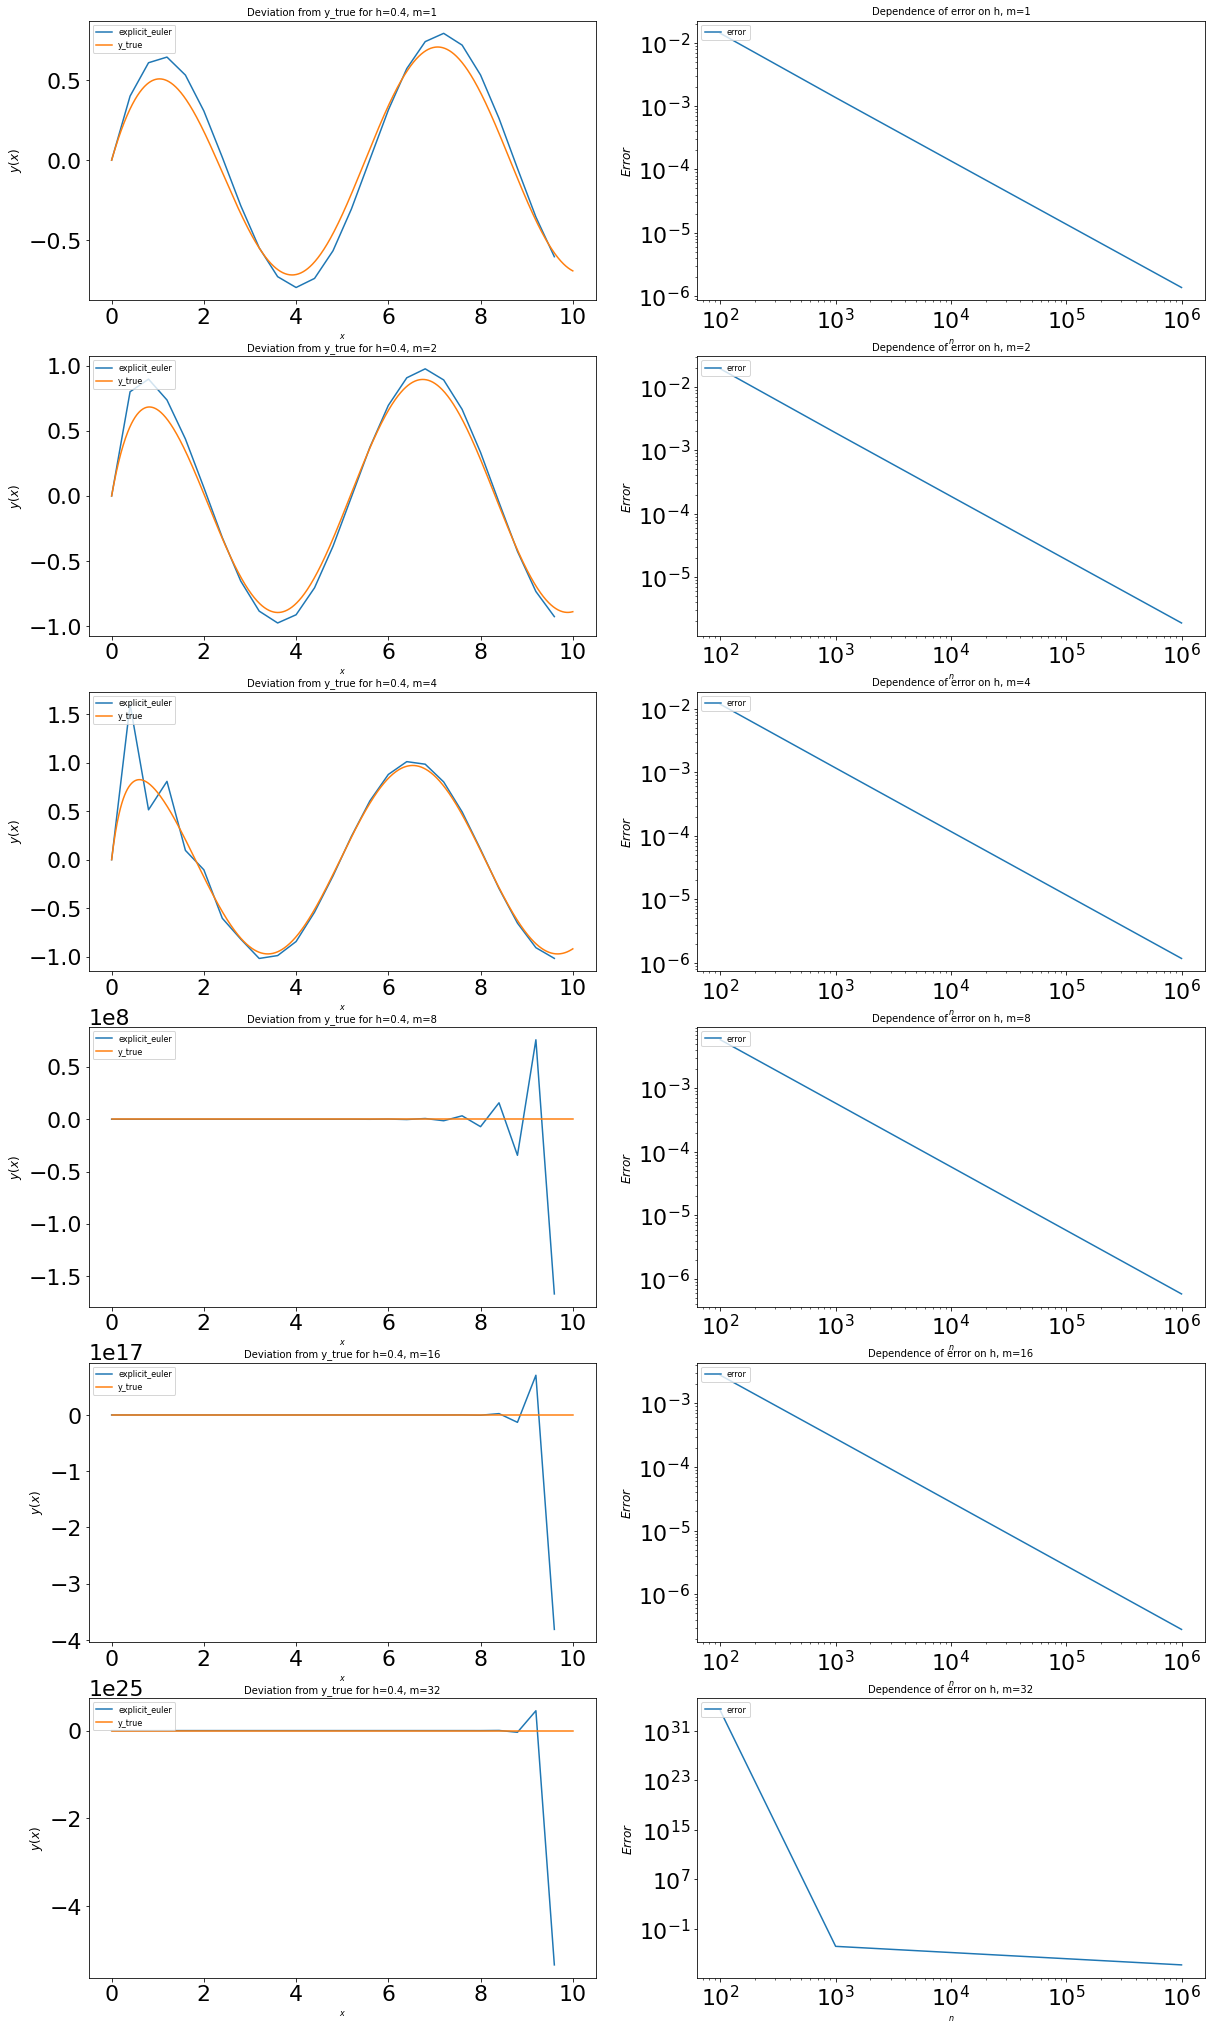

In [66]:
def explicit_euler(y0,h,a,b,m):
    mas_x=[a]
    mas_y=[y0]
    x_i=a
    y_i=y0
    while True:
        x_ip1=x_i+h
        y_ip1=y_i-h*m*(y_i-np.cos(x_i))
        y_i=y_ip1
        x_i=x_ip1
        if (x_i > b):
            break
        mas_x.append(x_i)
        mas_y.append(y_i)
    return mas_x, mas_y

def y_true(x,m):
    return -m**2/(1+m**2)*np.exp(-m*x)+m**2/(1+m**2)*np.cos(x)+m/(1+m**2)*np.sin(x)

a=0
b=10

fig,ax=plt.subplots(6,2)
fig.set_figheight(36)
fig.set_figwidth(20)
for j in range(6):
    m=2**j
    mas_n=[10**i for i in range(2,7)]
    mas_err=[]
    y_true_b=y_true(x=b,m=m)
    for n in mas_n:
        mas_x_explicit_euler,mas_y_explicit_euler=explicit_euler(y0=0,h=(b-a)/n,a=a,b=b,m=m)
        tek_err=np.abs(y_true_b-mas_y_explicit_euler[-1])
        mas_err.append(tek_err)

    mas_x_explicit_euler,mas_y_explicit_euler=explicit_euler(y0=0,h=0.4,a=a,b=b,m=m)

    

    ax[j,0].plot(mas_x_explicit_euler,mas_y_explicit_euler,label='explicit_euler')
    ax[j,0].plot(np.linspace(a,b,1000), y_true(x=np.linspace(a,b,1000),m=m),label='y_true')
    ax[j,0].set_xlabel(r'$x$',size=8)
    ax[j,0].set_ylabel(r'$y(x)$',size=12)
    ax[j,0].legend(loc=2,prop={'size': 8})
    ax[j,0].set_title('Deviation from y_true for h=0.4, m='+str(m),size=10)

    ax[j,1].loglog(mas_n,mas_err,label='error')
    ax[j,1].set_xlabel(r'$n$',size=8)
    ax[j,1].set_ylabel(r'$Error$',size=12)
    ax[j,1].legend(loc=2,prop={'size': 8})
    ax[j,1].set_title('Dependence of error on h, m='+str(m),size=10)

plt.show()

In [271]:
mas_h=[(b-a)/n for n in mas_n]
(np.log(mas_err[-1])-np.log(mas_err[-2]))/(np.log(mas_h[-1])-np.log(mas_h[-2]))

1.0000051661808234

We see that explicit Euler has first order of error convergence (global error in right point decreases proportional to $h$)

So we see that the global error degree of the explicit Euler scheme is one, as we expected.
And we also see that for large m the step size $h=0.4$ is too big - because we see strange oscillations.
In fact, I found in literature, that for a problem $y'=-my$ if we use explicit euler scheme, that is  scheme $y_{k+1}=(1-hm)y_k$, then the step need to be less than courant's number $h=\frac{2}{m}$ - because multiplier $1-hm$ should be less than one - because otherwise $y_k$ will be changing sign and growing in modulus instead of tending to zero.

In [6]:
for j in range(6):
    m=2**j
    print("m=",m,"h_courant=",2/m)

m= 1 h_courant= 2.0
m= 2 h_courant= 1.0
m= 4 h_courant= 0.5
m= 8 h_courant= 0.25
m= 16 h_courant= 0.125
m= 32 h_courant= 0.0625


And we see that $h=0.4$ gave oscillations (but not totally bad) first for the $m=4$ - because for this m our $h=0.4$ 
gets close to h_courant - so for greater $m$ step $h=0.4$ is larger than their courant number, so it is expected that we see bad oscillations in plots 

Now let's calculate solution in right point with e_tol=1e-5 and see how many steps we need.

In [16]:
last_yn=0
h=(b-a)/100
m=5
mas_x_explicit_euler,mas_y_explicit_euler=explicit_euler(y0=0,h=h,a=a,b=b,m=m)
err=1.0
e_tol=1e-5
cnt_steps=0
while err > e_tol:
    cnt_steps+=1
    mas_x, mas_y=explicit_euler(y0=0,h=h,a=a,b=b,m=m)
    tek_xn=mas_x[-1]
    tek_yn=mas_y[-1]
    err=np.abs(tek_yn-last_yn)
    last_yn=tek_yn
    h=h/2
    print("Step=",cnt_steps,"err=",err)

Step= 1 err= 0.920907960318667
Step= 2 err= 0.012230435896106062
Step= 3 err= 0.010584169524645248
Step= 4 err= 0.009952262658666888
Step= 5 err= 0.0005916247422803611
Step= 6 err= 0.0008304358855761862
Step= 7 err= 0.0007098293714816739
Step= 8 err= 0.000638051247072835
Step= 9 err= 3.695204074338765e-05
Step= 10 err= 5.215948864678577e-05
Step= 11 err= 4.4551066613163215e-05
Step= 12 err= 3.994054011124959e-05
Step= 13 err= 2.3093794608852747e-06


We see that explicit Euler needs 13 steps to read e_tol=1e-5.

# 3b: Impicit trapezoidal rule

$y_{k+1}=y_k+0.5*h*(-my_k +mcos {x_k} -my_{k+1} + m cos {x_{k+1}})$

=> $y_{k+1}(1+0.5*m*h)= y_k+0.5*h*(-my_k +mcos {x_k} + m cos {x_{k+1}})$

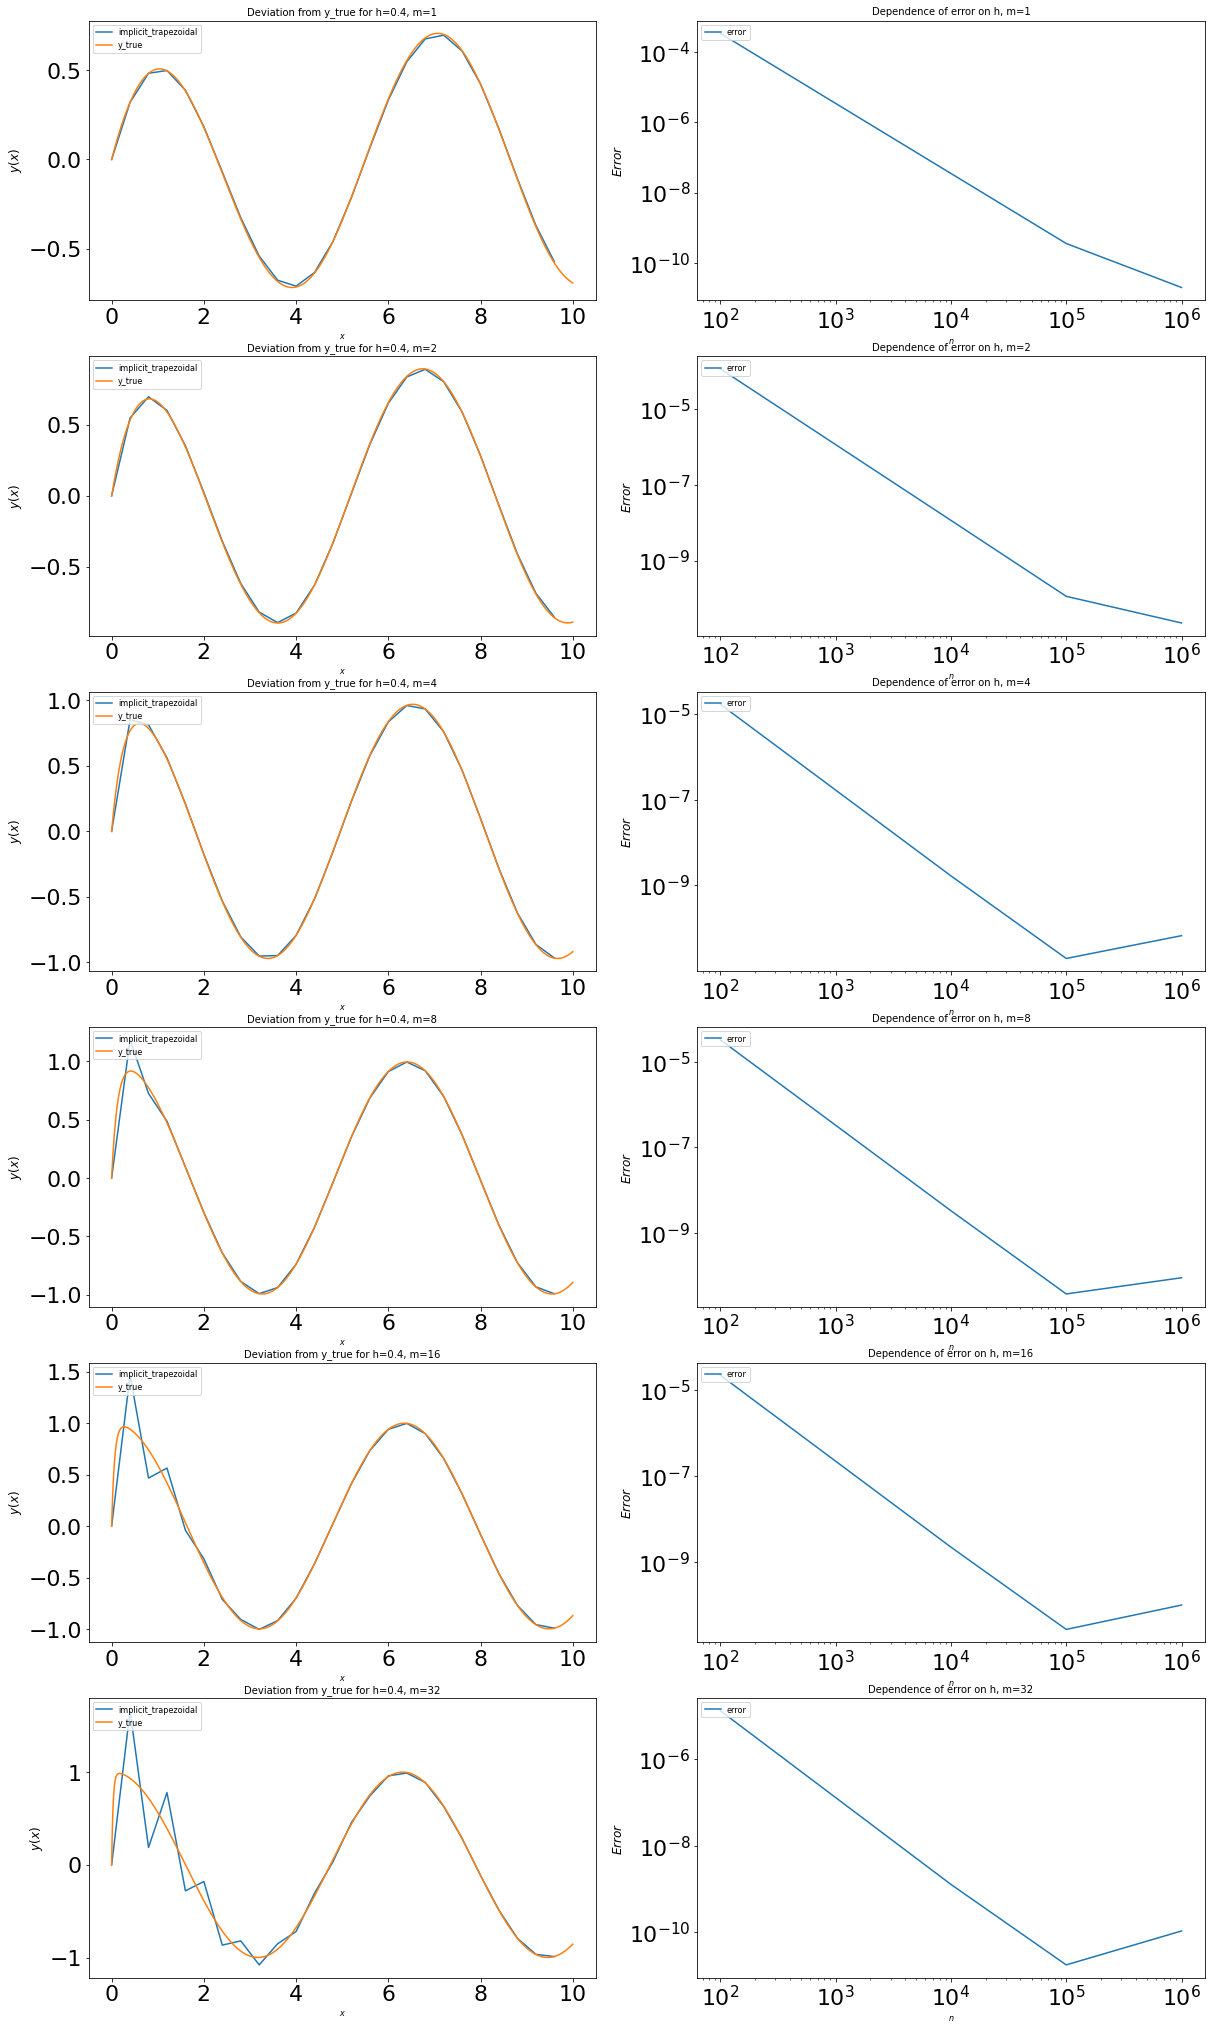

In [68]:
def implicit_trapezoidal(y0,h,a,b,m):
    mas_x=[a]
    mas_y=[y0]
    x_i=a
    y_i=y0
    while True:
        x_ip1=x_i+h
        y_ip1=(y_i+0.5*h*(-m*(y_i-np.cos(x_i))+m*np.cos(x_ip1)))/(1+0.5*m*h)
        y_i=y_ip1
        x_i=x_ip1
        if (x_i > b):
            break
        mas_x.append(x_i)
        mas_y.append(y_i)
    return mas_x, mas_y

def y_true(x,m):
    return -m**2/(1+m**2)*np.exp(-m*x)+m**2/(1+m**2)*np.cos(x)+m/(1+m**2)*np.sin(x)

a=0
b=10

fig,ax=plt.subplots(6,2)
fig.set_figheight(36)
fig.set_figwidth(20)
for j in range(6):
    m=2**j
    mas_n=[10**i for i in range(2,7)]
    mas_err=[]
    y_true_b=y_true(x=b,m=m)
    for n in mas_n:
        mas_x_implicit_trapezoidal,mas_y_implicit_trapezoidal=implicit_trapezoidal(y0=0,h=(b-a)/n,a=a,b=b,m=m)
        tek_err=np.abs(y_true_b-mas_y_implicit_trapezoidal[-1])
        mas_err.append(tek_err)

    mas_x_implicit_trapezoidal,mas_y_implicit_trapezoidal=implicit_trapezoidal(y0=0,h=0.4,a=a,b=b,m=m)

    

    ax[j,0].plot(mas_x_implicit_trapezoidal,mas_y_implicit_trapezoidal,label='implicit_trapezoidal')
    ax[j,0].plot(np.linspace(a,b,1000), y_true(x=np.linspace(a,b,1000),m=m),label='y_true')
    ax[j,0].set_xlabel(r'$x$',size=8)
    ax[j,0].set_ylabel(r'$y(x)$',size=12)
    ax[j,0].legend(loc=2,prop={'size': 8})
    ax[j,0].set_title('Deviation from y_true for h=0.4, m='+str(m),size=10)

    ax[j,1].loglog(mas_n,mas_err,label='error')
    ax[j,1].set_xlabel(r'$n$',size=8)
    ax[j,1].set_ylabel(r'$Error$',size=12)
    ax[j,1].legend(loc=2,prop={'size': 8})
    ax[j,1].set_title('Dependence of error on h, m='+str(m),size=10)

plt.show()

In [301]:
mas_h=[(b-a)/n for n in mas_n]
(np.log(mas_err[2])-np.log(mas_err[1]))/(np.log(mas_h[2])-np.log(mas_h[1]))

1.999989255156947

We see that global error of implicit trapezoidal is $O(h^2)$ and we also see that explicit scheme allows us to use larger $h$ for the same $m$ - for example, for $m=4$ trapeziodal does not have oscillations with $h=0.4$, but explicit Euler does have oscillateions.

In [19]:
last_yn=0
h=(b-a)/100
m=5
mas_x_implicit_trapezoidal,mas_y_implicit_trapezoidal=implicit_trapezoidal(y0=0,h=h,a=a,b=b,m=m)
err=1.0
e_tol=1e-5
cnt_steps=0
while err > e_tol:
    cnt_steps+=1
    mas_x, mas_y=implicit_trapezoidal(y0=0,h=h,a=a,b=b,m=m)
    tek_xn=mas_x[-1]
    tek_yn=mas_y[-1]
    err=np.abs(tek_yn-last_yn)
    last_yn=tek_yn
    h=h/2
    print("Step=",cnt_steps,"err=",err)

Step= 1 err= 0.9114477527159203
Step= 2 err= 0.016916743303529214
Step= 3 err= 0.008186266676264542
Step= 4 err= 0.008758788399098272
Step= 5 err= 3.3701505486316563e-07


We see that implicit trapezoidal scheme needs only 5 iterations, while explicit Euler needed 13 steps to reach the same accuracy!

# 3c: Now use Runge-Kutta 4th order scheme

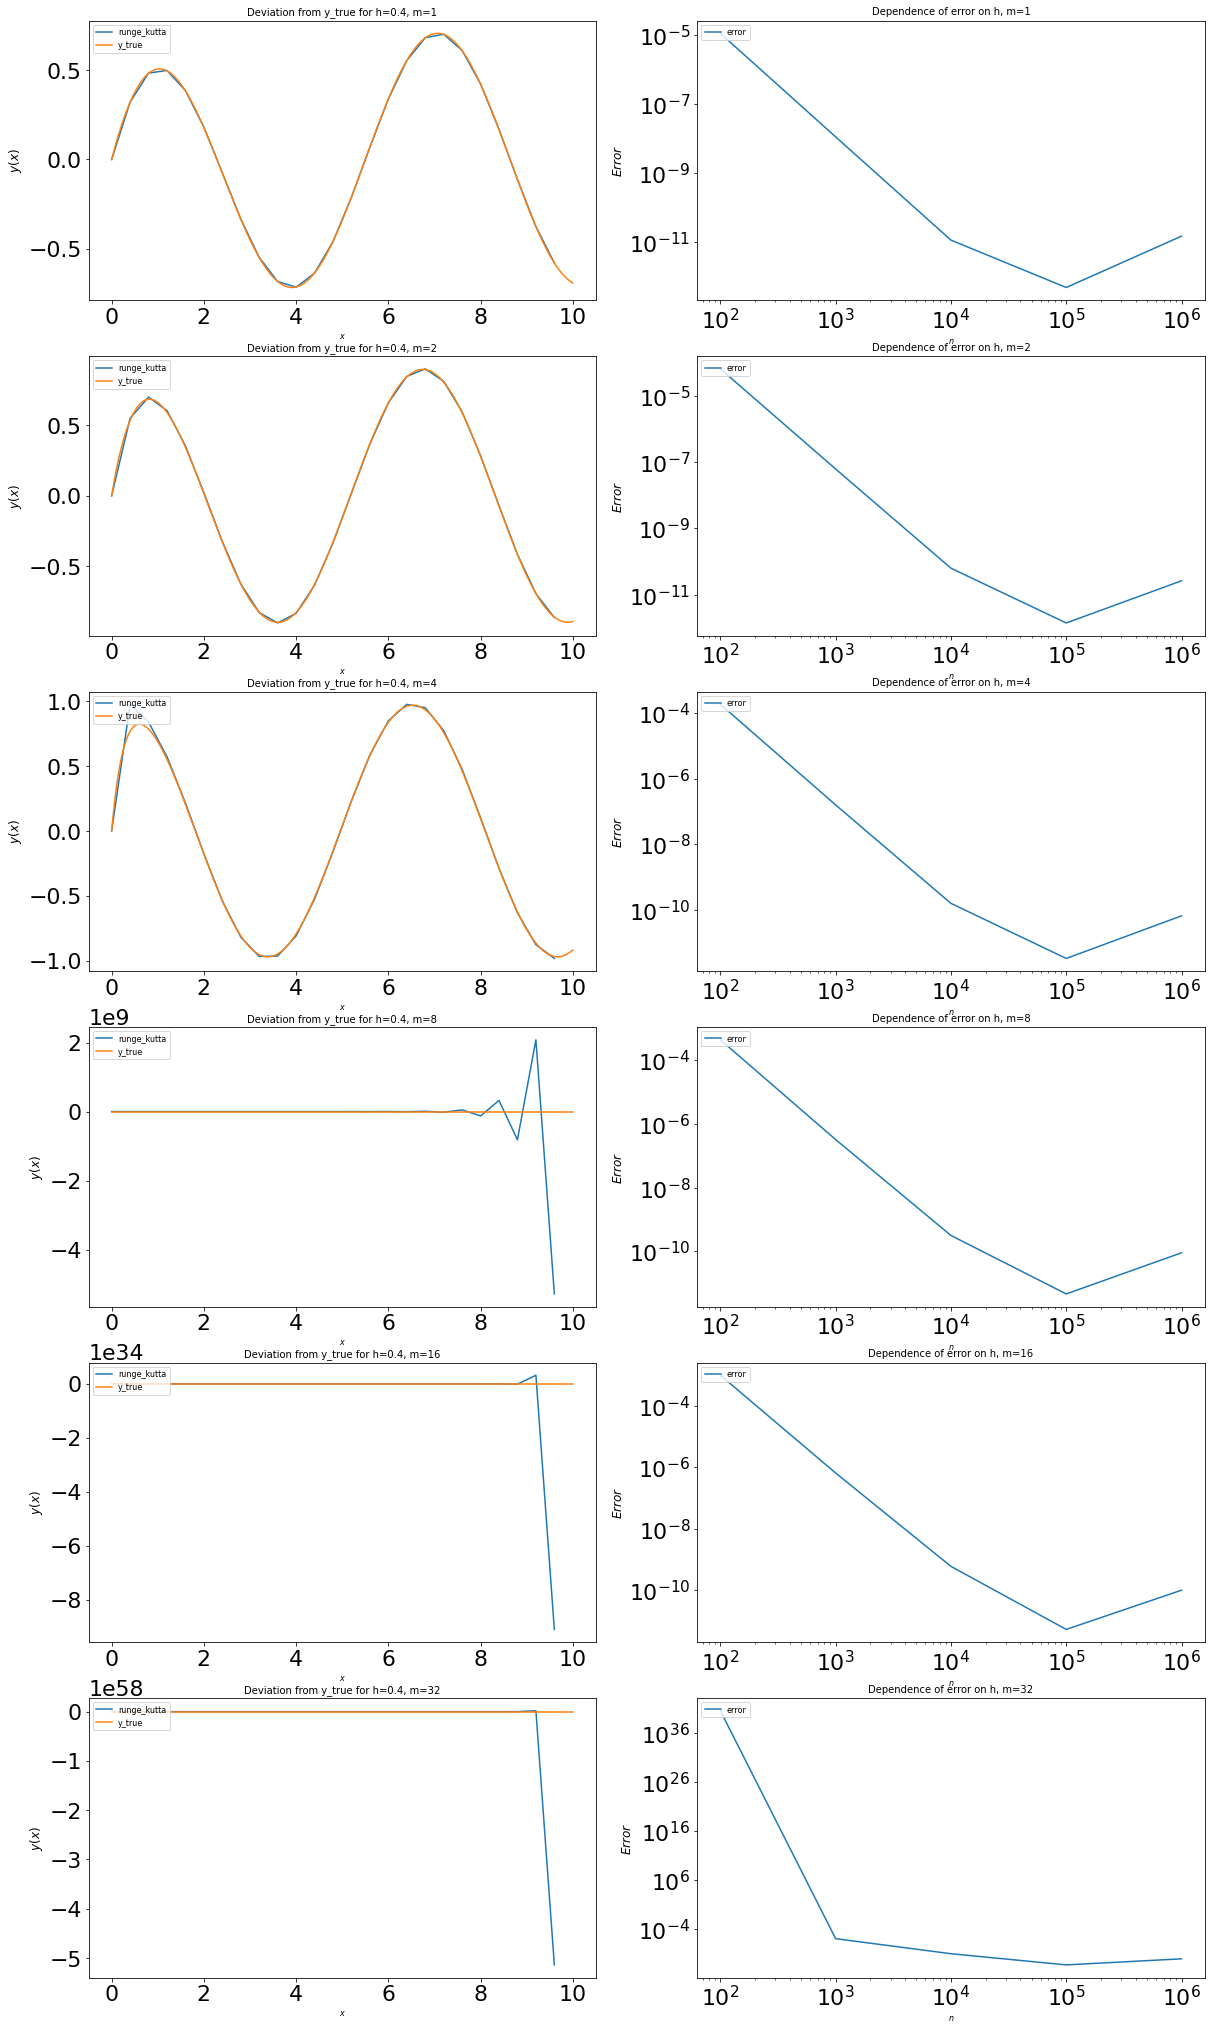

In [69]:
def Fi(x_i,y_i,m):
    return -m*y_i+m*np.cos(x_i)

def runge_kutta4(y0,h,a,b,m):
    mas_x=[a]
    mas_y=[y0]
    x_i=a
    y_i=y0
    while True:
        f1=Fi(x_i,y_i,m)
        f2=Fi(x_i+0.5*h, y_i+0.5*h*f1,m)
        f3=Fi(x_i+0.5*h, y_i+0.5*h*f2,m)
        f4=Fi(x_i+h, y_i+h*f2,m)
        x_ip1=x_i+h
        y_ip1=y_i+h/6*(f1+2*f2+2*f3+f4)
        y_i=y_ip1
        x_i=x_ip1
        if (x_i > b):
            break
        mas_x.append(x_i)
        mas_y.append(y_i)
    return mas_x, mas_y

def y_true(x,m):
    return -m**2/(1+m**2)*np.exp(-m*x)+m**2/(1+m**2)*np.cos(x)+m/(1+m**2)*np.sin(x)

a=0
b=10

fig,ax=plt.subplots(6,2)
fig.set_figheight(36)
fig.set_figwidth(20)
for j in range(6):
    m=2**j
    mas_n=[10**i for i in range(2,7)]
    mas_err=[]
    y_true_b=y_true(x=b,m=m)
    for n in mas_n:
        mas_x_runge_kutta4,mas_y_runge_kutta4=runge_kutta4(y0=0,h=(b-a)/n,a=a,b=b,m=m)
        tek_err=np.abs(y_true_b-mas_y_runge_kutta4[-1])
        mas_err.append(tek_err)

    mas_x_runge_kutta4,mas_y_runge_kutta4=runge_kutta4(y0=0,h=0.4,a=a,b=b,m=m)

    

    ax[j,0].plot(mas_x_runge_kutta4,mas_y_runge_kutta4,label='runge_kutta')
    ax[j,0].plot(np.linspace(a,b,1000), y_true(x=np.linspace(a,b,1000),m=m),label='y_true')
    ax[j,0].set_xlabel(r'$x$',size=8)
    ax[j,0].set_ylabel(r'$y(x)$',size=12)
    ax[j,0].legend(loc=2,prop={'size': 8})
    ax[j,0].set_title('Deviation from y_true for h=0.4, m='+str(m),size=10)

    ax[j,1].loglog(mas_n,mas_err,label='error')
    ax[j,1].set_xlabel(r'$n$',size=8)
    ax[j,1].set_ylabel(r'$Error$',size=12)
    ax[j,1].legend(loc=2,prop={'size': 8})
    ax[j,1].set_title('Dependence of error on h, m='+str(m),size=10)

plt.show()

In [33]:
mas_h=[(b-a)/n for n in mas_n]
(np.log(mas_err[2])-np.log(mas_err[1]))/(np.log(mas_h[2])-np.log(mas_h[1]))

3.060827731706138

In [34]:
last_yn=0
h=(b-a)/100
m=5
mas_x_runge_kutta4,mas_y_runge_kutta4=runge_kutta4(y0=0,h=h,a=a,b=b,m=m)
err=1.0
e_tol=1e-5
cnt_steps=0
while err > e_tol:
    cnt_steps+=1
    mas_x, mas_y=runge_kutta4(y0=0,h=h,a=a,b=b,m=m)
    tek_xn=mas_x[-1]
    tek_yn=mas_y[-1]
    err=np.abs(tek_yn-last_yn)
    last_yn=tek_yn
    h=h/2
    print("Step=",cnt_steps,"err=",err)

Step= 1 err= 0.9116697609122792
Step= 2 err= 0.016717640140602397
Step= 3 err= 0.008207427889874386
Step= 4 err= 0.008760584177224029
Step= 5 err= 3.485057150642845e-07


We see that runge-kutta has global error O(h^3) - while I expected global error O(h^4), and we also see that it is explicit - but it needs only 5 steps, not 13, to reach e_tol=1e-5! it is almost as good as implicit trapezoidal - and it even has higher degree of h in error term, than implicit trapezoidal!

# 3d: Finally, attempt to solve the problem using in-built Python solvers (non-stiff and stiff). Comment on their relative performance versus the previous implementations.

Lets use scipy.integrate.ode (voda) with  method: ‘adams’ or ‘bdf’ 
Which solver to use: Adams (non-stiff) or BDF (stiff) but we will try both

In [55]:
from scipy.integrate import ode

y0=0
t0=a

def f(t, y, m):
    return -m*(y-np.cos(t))

r = ode(f).set_integrator('zvode', method='bdf',atol=1e-5) #we set that we need absolute tolerance 1e-5
r.set_initial_value(y0, t0).set_f_params(5.0)

t1 = b
dt = 0.4
cnt_steps=0
while r.successful() and r.t+dt < t1:
    cnt_steps+=1
    y_n=r.integrate(r.t+dt)
    print(r.t+dt, y_n)

y_tr=y_true(b,m)
print("cnt_steps=",cnt_steps)
print("y_n=",y_n)
print("y_true=",y_tr)
print("err=",np.abs(y_tr-y_n[0].real))

0.8 [0.83042431+0.j]
1.2000000000000002 [0.79026238+0.j]
1.6 [0.52526264+0.j]
2.0 [0.16381983+0.j]
2.4 [-0.22532479+0.j]
2.8 [-0.5791326+0.j]
3.1999999999999997 [-0.84156982+0.j]
3.5999999999999996 [-0.97112236+0.j]
3.9999999999999996 [-0.94736886+0.j]
4.3999999999999995 [-0.77403562+0.j]
4.8 [-0.47850834+0.j]
5.2 [-0.1074187+0.j]
5.6000000000000005 [0.28060395+0.j]
6.000000000000001 [0.62436568+0.j]
6.400000000000001 [0.86951877+0.j]
6.800000000000002 [0.97739595+0.j]
7.200000000000002 [0.93098652+0.j]
7.600000000000002 [0.73756533+0.j]
8.000000000000002 [0.4277285+0.j]
8.400000000000002 [0.05035474+0.j]
8.800000000000002 [-0.33497245+0.j]
9.200000000000003 [-0.66742247+0.j]
9.600000000000003 [-0.89449732+0.j]
10.000000000000004 [-0.98033777+0.j]
cnt_steps= 24
y_n= [-0.98033777+0.j]
y_true= -0.9114189915906985
err= 0.0689187804883794


We see that in "stiff-problem" mode in-built solver finds step $h=0.4$ too large and is unable to reach e_tol 1e-5 

In [59]:
from scipy.integrate import ode

y0=0
t0=a

def f(t, y, m):
    return -m*(y-np.cos(t))

r = ode(f).set_integrator('zvode', method='adams',atol=1e-5)
r.set_initial_value(y0, t0).set_f_params(5.0)

t1 = b
dt = 0.4
cnt_steps=0
while r.successful() and r.t+dt < t1:
    cnt_steps+=1
    y_n=r.integrate(r.t+dt)
    print(r.t+dt, y_n)

y_tr=y_true(b,m)
print("cnt_steps=",cnt_steps)
print("y_n=",y_n)
print("y_true=",y_tr)
print("err=",np.abs(y_tr-y_n[0].real))

0.8 [0.83039145+0.j]
1.2000000000000002 [0.79024696+0.j]
1.6 [0.52528052+0.j]
2.0 [0.16382717+0.j]
2.4 [-0.22532069+0.j]
2.8 [-0.57914032+0.j]
3.1999999999999997 [-0.84156351+0.j]
3.5999999999999996 [-0.97114216+0.j]
3.9999999999999996 [-0.94735137+0.j]
4.3999999999999995 [-0.77399918+0.j]
4.8 [-0.47851346+0.j]
5.2 [-0.10743136+0.j]
5.6000000000000005 [0.28060218+0.j]
6.000000000000001 [0.6243396+0.j]
6.400000000000001 [0.8695081+0.j]
6.800000000000002 [0.97739467+0.j]
7.200000000000002 [0.93098754+0.j]
7.600000000000002 [0.73757622+0.j]
8.000000000000002 [0.42773432+0.j]
8.400000000000002 [0.0503499+0.j]
8.800000000000002 [-0.3349617+0.j]
9.200000000000003 [-0.66742195+0.j]
9.600000000000003 [-0.89448115+0.j]
10.000000000000004 [-0.9803251+0.j]
cnt_steps= 24
y_n= [-0.9803251+0.j]
y_true= -0.9114189915906985
err= 0.06890610706097933


We see that in "non-stiff-problem" mode in-built solver finds step  ℎ=0.4  too large and is unable to reach e_tol 1e-5

So our implemented runge-kutta 4th order demonstrates best behaviour; and it is explicit; so it is more convenient to use it